## Clean Technologies - Deterministic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
categories = pd.read_excel('../data/categories.xls')
categories = categories.fillna(method='ffill')
categories.columns = ['sector','technology_group','technology','description','technology_term','source','priority']

In [4]:
categories.head()

,sector,technology_group,technology,description,technology_term,source,priority
0,Energy,Solar energy sources,solar PV,Also “solar photovoltaic”; technology of using...,"photovoltaic, PV, “solar cell”",https://www.ctc-n.org/technologies/solar-pv,1
1,Energy,Solar energy sources,concentrated solar power (CSP),Technology of producing electricity by concent...,"“concentrated solar power”, CSP, “concentrated...",https://setis.ec.europa.eu/technologies/concen...,1
2,Energy,Solar energy sources,solar heating,Technology of capturing the sun's radiation an...,“solar heating”,https://www.ctc-n.org/technologies/solar-heating,0
3,Energy,Solar energy sources,solar dryer,"Technology of drying substances, especially fo...",“solar dryer”,https://www.ctc-n.org/technologies/solar-dryer,0
4,Energy,Solar energy sources,solar water pump,Technology of powering electrical water pumps ...,“solar water pump”,https://www.ctc-n.org/technologies/solar-water...,0


In [18]:
len(categories.sector.unique())

6

In [5]:
matrix = []
for term in categories['technology_term']:
    row = [x.strip() for x in term.split(',')]
    row = [i.replace('“', '').replace('”', '') for i in row]
    matrix.append(row)
categories['technology_term'] = matrix

---

In [6]:
#https://data.europa.eu/euodp/en/data/dataset/cordisH2020projects

In [7]:
cordish2020 = pd.read_excel('../data/cordis-h2020projects.xlsx')
#cordish2020 = pd.read_csv('../data/cordis-h2020projects.csv', sep=";")

In [8]:
cordish2020.columns

Index(['rcn', 'id', 'acronym', 'status', 'programme', 'topics',
       'frameworkProgramme', 'title', 'startDate', 'endDate', 'projectUrl',
       'objective', 'totalCost', 'ecMaxContribution', 'call', 'fundingScheme',
       'coordinator', 'coordinatorCountry', 'participants',
       'participantCountries', 'subjects'],
      dtype='object')

In [9]:
cordish2020['totalCost'] = [float(str(i).replace(',', '.')) for i in cordish2020['totalCost']]
cordish2020['ecMaxContribution'] = [float(str(i).replace(',', '.')) for i in cordish2020['ecMaxContribution']]

In [10]:
cordish2020['startDate'] = cordish2020['startDate'].map(pd.Timestamp)
cordish2020['endDate'] = cordish2020['endDate'].map(pd.Timestamp)

In [11]:
# Total of proyects
len(cordish2020)

24554

Objective example

---

In [12]:
cordish2020.loc[13]['objective']

'Neurological diseases cause enormous suffering and a great economic burden. Almost 20 million Europeans are affected by the most frequently occurring and disabling disease entities, such as stroke, Alzheimerâ€™s disease (AD), or multiple sclerosis (MS), and these numbers do not include the large group of rare diseases that affect the CNS. Overall, the annual costs for patient care amount to 400 billion Euros. Common features of many neurological diseases are a vascular pathology with impaired blood-brain barrier (BBB) function or with reduced blood flow and inflammatory changes. As the two are often associated, disentangling their intricate and mutual relationship is a major task for translational neuroscience that could improve the treatment of many neurological diseases. At the cellular level, key players are brain endothelial cells as the building blocks of cerebral vessels and macrophages as the main inflammatory cells of the brain. Recent discoveries indicate that endothelial cel

---

### Deterministic text labeling, Flashtext for easy regex

In [19]:
from flashtext import KeywordProcessor

In [20]:
def extract(vec, dictionary, info=False):
    empty = []
    for line in vec:
        empty.append(dictionary.extract_keywords(line, span_info=info))
    return empty

In [21]:
# unique list of technology group
technology_group = list(categories['technology_group'].unique())
len(technology_group)

24

In [22]:
dictionary1 = KeywordProcessor()
dictionary1.add_keywords_from_list(technology_group)
extracted1 = extract(cordish2020['objective'], dictionary1)
cordish2020['matches_group'] = [list(set(i)) if len(i)>0 else '' for i in extracted1]
cordish2020['count_matches_group'] = [len(i) for i in extracted1]
cordish2020['count_unique_matches_group'] = [len(set(i)) for i in extracted1]

In [23]:
# unique list of technology term
technology_term = [y for x in categories['technology_term'] for y in x if y != '']
len(technology_term)

223

In [24]:
#adding the new list of terms
dictionary2 = KeywordProcessor()
dictionary2.add_keywords_from_list(technology_term)
extracted2 = extract(cordish2020['objective'], dictionary2)
cordish2020['matches_technology'] = [list(set(i)) if len(i)>0 else '' for i in extracted2]
cordish2020['count_matches_technology'] = [len(i) for i in extracted2]
cordish2020['count_unique_matches_technology'] = [len(set(i)) for i in extracted2]

In [25]:
#cordish2020.head()

In [26]:
# filter only the rows with at least one match
cordish2020['count_matches'] = cordish2020['count_matches_group'] + cordish2020['count_matches_technology'] 
cordish2020matches = cordish2020[cordish2020['count_matches_technology'] > 0 ] #at least one match with technology term

In [27]:
cordish2020matches.columns

Index(['rcn', 'id', 'acronym', 'status', 'programme', 'topics',
       'frameworkProgramme', 'title', 'startDate', 'endDate', 'projectUrl',
       'objective', 'totalCost', 'ecMaxContribution', 'call', 'fundingScheme',
       'coordinator', 'coordinatorCountry', 'participants',
       'participantCountries', 'subjects', 'matches_group',
       'count_matches_group', 'count_unique_matches_group',
       'matches_technology', 'count_matches_technology',
       'count_unique_matches_technology', 'count_matches'],
      dtype='object')

In [28]:
len(cordish2020matches)

2052

In [31]:
print(100*len(cordish2020matches)/len(cordish2020))

8.357090494420461


In [30]:
#this is the list we need to compare with the probabilistic
cordish2020matches.id[:20]

2      815147
5      835398
14     826097
16     835541
33     812602
43     811592
45     847641
66     805344
69     779606
75     818470
106    799408
126    786483
131    841910
132    838686
134    842633
149    820892
159    814400
185    830036
190    836317
205    814106
Name: id, dtype: int64

In [32]:
cordish2020matches.columns

Index(['rcn', 'id', 'acronym', 'status', 'programme', 'topics',
       'frameworkProgramme', 'title', 'startDate', 'endDate', 'projectUrl',
       'objective', 'totalCost', 'ecMaxContribution', 'call', 'fundingScheme',
       'coordinator', 'coordinatorCountry', 'participants',
       'participantCountries', 'subjects', 'matches_group',
       'count_matches_group', 'count_unique_matches_group',
       'matches_technology', 'count_matches_technology',
       'count_unique_matches_technology', 'count_matches'],
      dtype='object')

In [38]:
cordish2020matches[['acronym','title','endDate','ecMaxContribution','matches_group','count_matches']].sort_values('count_matches', ascending=False).head(10)

,acronym,title,endDate,ecMaxContribution,matches_group,count_matches
3745,STEMM-CCS,Strategies for Environmental Monitoring of Mar...,2020-02-29,15918369.00,"[Storage, CCS]",28
17201,ACT,Accellerating CCS technologies as a new low-ca...,2021-01-31,11889929.23,"[Storage, CCS]",27
2580,FLOATMAST,An Innovative Wind Resource Assessment Tension...,2015-11-30,50000.00,[Wind],24
1784,WITRO,Wind and Turbulence Radar for Offshore wind en...,2015-12-31,50000.00,[Wind],22
22707,Small-scale CSP,Numerical and experimental analysis of a novel...,2020-05-31,212194.80,[Storage],22
11216,SENSIBLE,Storage-Enabled Sustainable Energy for Buildin...,2018-12-31,11842396.76,"[Storage, Energy management]",20
18498,acteno,Industrial Energy Storage Integration - develo...,2018-08-31,143900.00,[Storage],19
19944,FLOWSPA,Floating Offshore Wind Support Platform and As...,2017-09-30,50000.00,[Wind],19
6939,REMOTE,Remote area Energy supply with Multiple Option...,2021-12-31,4995950.25,"[Storage, Wind, Fuel]",19
8750,AutoRE,AUTomotive deRivative Energy system,2018-07-31,3496947.00,[Fuel],18


In [23]:
cordish2020matches.sort_values('count_matches', ascending=False).head(10)

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,...,participants,participantCountries,subjects,matches_group,count_matches_group,count_unique_matches_group,matches_technology,count_matches_technology,count_unique_matches_technology,count_matches
3745,200472,654462,STEMM-CCS,SIGNED,H2020-EU.3.3.2.3.,LCE-15-2015,H2020,Strategies for Environmental Monitoring of Mar...,2016-03-01,2020-02-29,...,UNIVERSITETET I TROMSOE - NORGES ARKTISKE UNIV...,NO;UK;AT;DE;NL,NaN,"[CCS, Storage]",15,2,"[CCS, carbon capture and storage]",13,2,28
17201,199423,691712,ACT,SIGNED,H2020-EU.3.3.2.;H2020-EU.3.3.3.;H2020-EU.3.3.4.,LCE-18-2015,H2020,Accellerating CCS technologies as a new low-ca...,2016-02-01,2021-01-31,...,ETHNIKO KENTRO EREVNAS KAI TECHNOLOGIKIS ANAPT...,EL;UK;DE;RO;TR;NL;ES;NO;CH,NaN,"[CCS, Storage]",14,2,[CCS],13,1,27
2580,197010,673782,FLOATMAST,CLOSED,H2020-EU.3.3.;H2020-EU.2.3.1.,SIE-01-2014-1,H2020,An Innovative Wind Resource Assessment Tension...,2015-06-01,2015-11-30,...,STREAMLINED SYMVOULI MECHANIKI EPE,EL,NaN,[Wind],15,1,"[onshore wind, offshore wind]",9,2,24
1784,198559,698136,WITRO,CLOSED,H2020-EU.3.3.;H2020-EU.2.3.1.,SIE-01-2015-1,H2020,Wind and Turbulence Radar for Offshore wind en...,2015-09-01,2015-12-31,...,NaN,NaN,NaN,[Wind],21,1,[offshore wind],1,1,22
22707,215270,794562,Small-scale CSP,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2017,H2020,Numerical and experimental analysis of a novel...,2018-06-01,2020-05-31,...,NaN,NaN,NaN,[Storage],7,1,"[CSP, concentrated solar power, Fresnel reflec...",15,6,22
11216,194405,645963,SENSIBLE,SIGNED,H2020-EU.3.3.,LCE-08-2014,H2020,Storage-Enabled Sustainable Energy for Buildin...,2015-01-01,2018-12-31,...,SIEMENS SA;MEADOWS OZONE ENERGY SERVICES LTD.;...,PT;UK;ES;DE;FR;FI,NaN,"[Energy management, Storage]",13,2,"[PV, renewable energy, thermal storage, CHP, e...",7,5,20
18498,210955,739615,acteno,CLOSED,H2020-EU.2.3.2.2.,INNOSUP-02-2016,H2020,Industrial Energy Storage Integration - develo...,2017-09-01,2018-08-31,...,NaN,NaN,NaN,[Storage],14,1,"[energy storage, renewable energy]",5,2,19
19944,207129,744518,FLOWSPA,CLOSED,H2020-EU.3.3.;H2020-EU.2.1.1.;H2020-EU.2.3.1.,SMEInst-09-2016-2017,H2020,Floating Offshore Wind Support Platform and As...,2017-02-01,2017-09-30,...,NaN,NaN,NaN,[Wind],11,1,[offshore wind],8,1,19
6939,213067,779541,REMOTE,SIGNED,H2020-EU.3.3.8.2.;H2020-EU.3.3.8.3.,FCH-02-12-2017,H2020,Remote area Energy supply with Multiple Option...,2018-01-01,2021-12-31,...,IRIS SRL;ETHNIKO KENTRO EREVNAS KAI TECHNOLOGI...,IT;EL;DK;NO;BE;FR,NaN,"[Wind, Fuel, Storage]",7,3,"[PV, CHP, fuel cell, energy storage, micro-grid]",12,5,19
8750,197929,671396,AutoRE,SIGNED,H2020-EU.3.3.8.1.,FCH-02.5-2014,H2020,AUTomotive deRivative Energy system,2015-08-01,2018-07-31,...,"SVEUCILISTE U SPLITU, FAKULTET ELEKTROTEHNIKE,...",HR;EL;NO;CH;DE;IT,NaN,[Fuel],7,1,"[CHP, fuel cell, combined heat and power]",11,3,18


In [32]:
def get_terms_matrix(vector_of_terms, all_terms):
    matrix = []
    for vector in vector_of_terms:
        ind_vector = [0] * len(all_terms)
        for v in vector:
            for idx, i in enumerate(all_terms):
                if v == i:
                    ind_vector[idx] = 1
        matrix.append(ind_vector)
    table = pd.DataFrame(matrix)
    return table

In [33]:
all_technology_terms = [i for i in set([*list(categories['technology_group']),*list(technology_term)])]

In [34]:
len(all_technology_terms)

235

In [35]:
all_technology_terms[:10]

['geothermal energy',
 'low green house gas refrigeration',
 'efficient lighting',
 'low GHG air conditioning',
 'landfill biocover',
 'soil management',
 'agro-sylviculture',
 'geothermal power',
 'Urban forestry',
 'low green house gas food-delivery chain']

In [36]:
#expected to have 225 columns
matches_technology_table = get_terms_matrix(list(cordish2020matches['matches_technology']), all_technology_terms)
matches_group_table = get_terms_matrix(list(cordish2020matches['matches_group']), all_technology_terms)

In [37]:
matches_table = matches_group_table + matches_technology_table
matches_table.columns = all_technology_terms
matches_table['number_unique_terms'] = matches_table.sum(axis=1)

In [38]:
matches_table.head()

,geothermal energy,low green house gas refrigeration,efficient lighting,low GHG air conditioning,landfill biocover,soil management,agro-sylviculture,geothermal power,Urban forestry,low green house gas food-delivery chain,...,compressed natural gas,osmotic power,liquefied natural gas,mid-season drainage,management of soil,blast furnace slag,DSM,food delivery chain,forest management,number_unique_terms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
len(matches_table) == len(cordish2020matches)

True

In [40]:
full_table_tech_matches = pd.concat([cordish2020matches.reset_index(), matches_table], axis=1).sort_values(['count_matches','number_unique_terms'], ascending=False).reset_index()

In [41]:
len(full_table_tech_matches)

2052

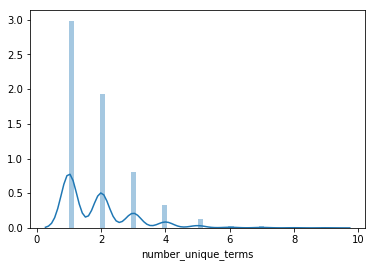

In [42]:
import seaborn as sns
sns.distplot(full_table_tech_matches['number_unique_terms'])

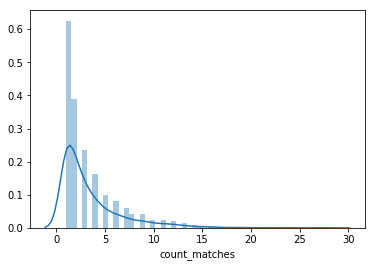

In [43]:
sns.distplot(full_table_tech_matches['count_matches'])

In [44]:
full_table_tech_matches.groupby('count_matches').count()['number_unique_terms']

count_matches
1     693
2     433
3     259
4     180
5     111
6      89
7      67
8      45
9      45
10     28
11     27
12     23
13     15
14     10
15      7
16      6
17      3
18      2
19      3
20      1
22      2
24      1
27      1
28      1
Name: number_unique_terms, dtype: int64

In [45]:
#for i, j in zip(full_table_tech_matches[full_table_tech_matches['count_matches'] ==2]['matches_technology'],full_table_tech_matches[full_table_tech_matches['count_matches'] ==2]['matches_group']):
#    print(i, j)

In [46]:
#full_table_tech_matches.columns[:35]#.head()

In [47]:
#for i in full_table_tech_matches.columns:
#    print(i)
#count_matches: each time a term in the glossary of 225 terms appear
#number_unique_terms: 

In [48]:
full_table_tech_matches[['id','acronym','title','objective','startDate','endDate','ecMaxContribution',
                         'coordinator', 'coordinatorCountry','matches_group','matches_technology','number_unique_terms','count_matches']].to_csv('../data/tech.csv')

In [49]:
termsT = full_table_tech_matches.iloc[:,33:-1].T
termsT['sum'] = termsT.sum(axis=1)

In [50]:
#termsT.sort_values('sum', ascending=False)

In [51]:
len(termsT[termsT['sum']>0])/len(termsT)

0.4827586206896552

In [52]:
#all_terms

In [56]:
data = pd.read_csv('../data/tech.csv')

In [57]:
len(data)

2052